In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

file_path = "/kaggle/input/global-air-pollution-dataset/global air pollution dataset.csv"
data = pd.read_csv(file_path)

# Plotting a histogram of PM2.5 Values

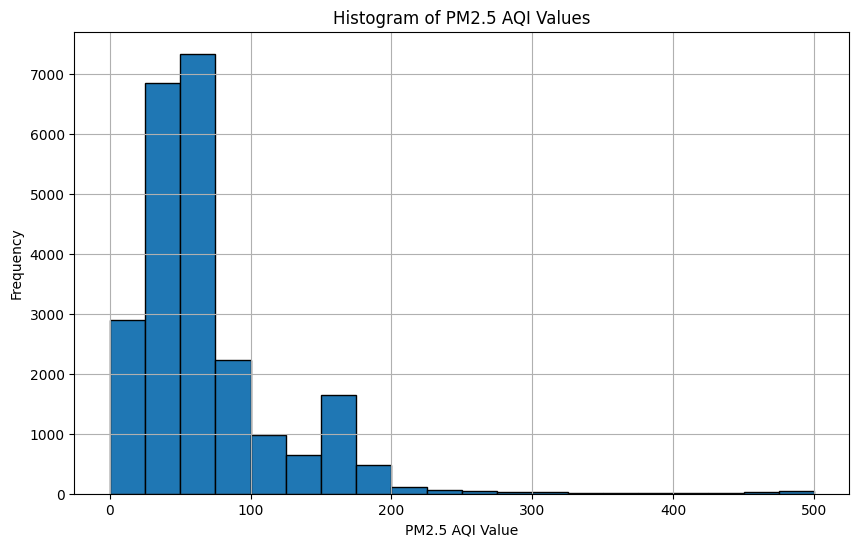

In [2]:
data['PM2.5 AQI Value'] = pd.to_numeric(data['PM2.5 AQI Value'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(data['PM2.5 AQI Value'], bins=20, edgecolor='black')
plt.title('Histogram of PM2.5 AQI Values')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting a histogram of PM2.5 Categories

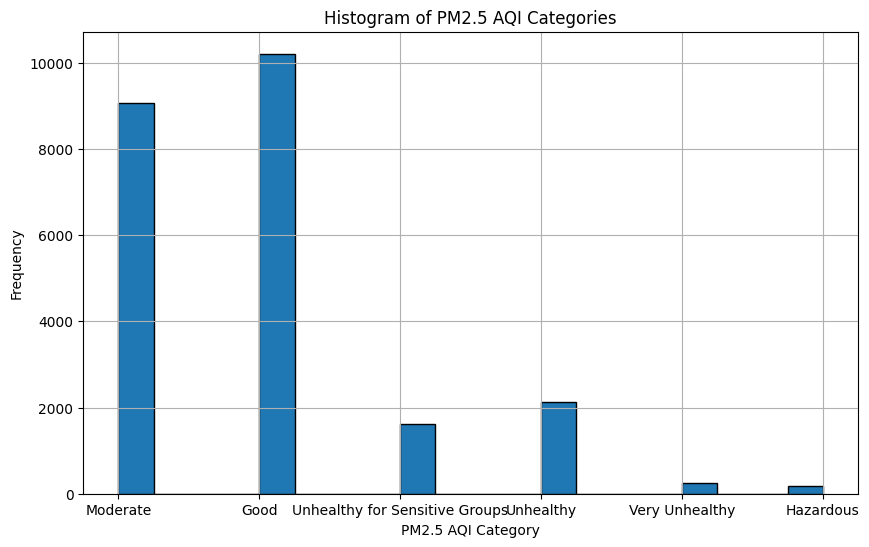

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(data['PM2.5 AQI Category'], bins=20, edgecolor='black')
plt.title('Histogram of PM2.5 AQI Categories')
plt.xlabel('PM2.5 AQI Category')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Identifying countries with most frequent PM2.5 category

In [4]:
pm25_counts = data.groupby(['Country', 'PM2.5 AQI Category']).size().reset_index(name='Counts')
max_countries = pm25_counts.loc[pm25_counts.groupby('PM2.5 AQI Category')['Counts'].idxmax()]

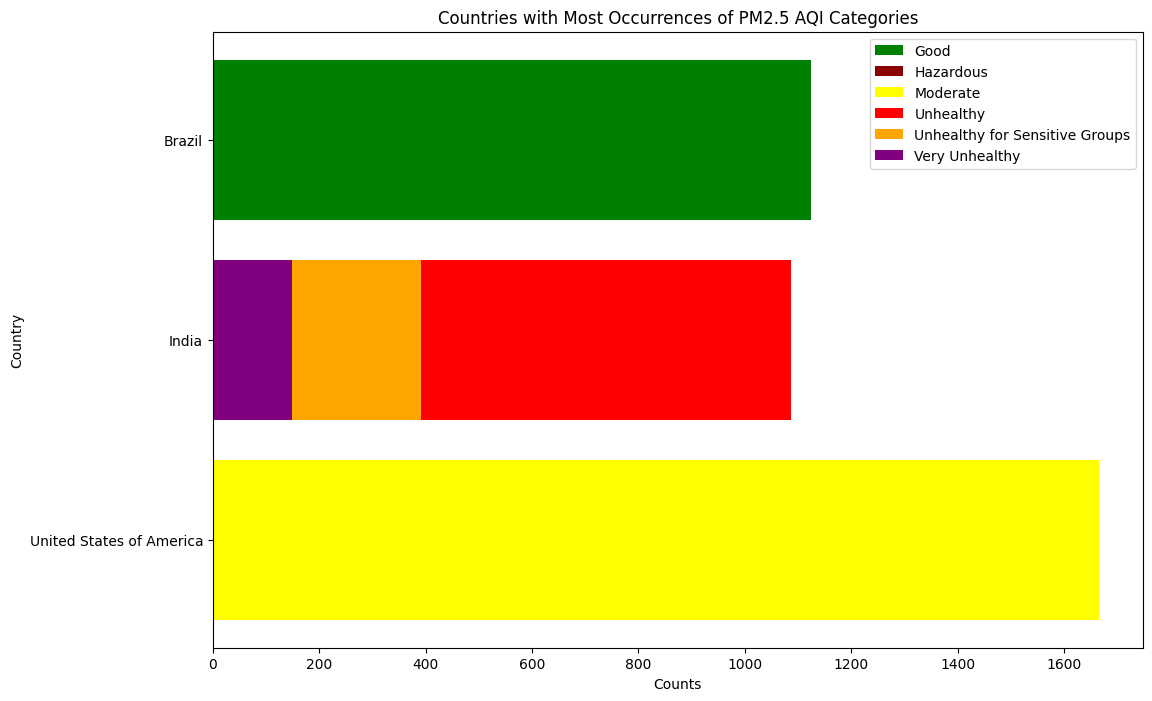

In [5]:
plt.figure(figsize=(12, 8))
colors = {'Good': 'green', 'Moderate': 'yellow', 'Unhealthy for Sensitive Groups': 'orange',
          'Unhealthy': 'red', 'Very Unhealthy': 'purple', 'Hazardous': 'darkred'}

grouped_data = data
for category, grouped_data in max_countries.groupby('PM2.5 AQI Category'):
    plt.barh(grouped_data['Country'], grouped_data['Counts'], color=colors[category], label=category)

plt.xlabel('Counts')
plt.ylabel('Country')
plt.title('Countries with Most Occurrences of PM2.5 AQI Categories')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to show highest counts at the top
plt.show()

# Computing average, mode, median and skewness

In [6]:
pm25_values = data['PM2.5 AQI Value'].dropna()

average = pm25_values.mean()
mode = stats.mode(pm25_values)[0]
median = pm25_values.median()
skewness = pm25_values.skew()

print(f'Average: {average:.2f}')
print(f'Mode: {mode}')
print(f'Median: {median}')
print(f'Skewness: {skewness:.2f}')

Average: 68.52
Mode: 50
Median: 54.0
Skewness: 2.82
